In [99]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.style
%matplotlib inline

In [101]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.23.5
Pandas Version 1.5.3
Seaborn Version 0.13.1
Matplotlib Version 3.7.1


Reading the data

In [102]:
houses = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MCA_Sem4/Capstone/Data/innercity.xlsx')
houses.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [103]:
#Listing the dayhours
houses["dayhours"].value_counts() #-- too many

#-- Splitting the year and month columns
houses['year'] = houses['dayhours'].str.slice(stop=4)
houses['month'] = houses['dayhours'].str.slice(start=4, stop=6)
houses.month.unique() #-- to ensure month is not more than 12

print(houses.shape)
#print(houses.head())

#--years counts
houses["year"].value_counts()

(21613, 25)


2014    14633
2015     6980
Name: year, dtype: int64

In [104]:
# Columns information
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [105]:
# Dropping redundant columns which are highly correlated with others
houses.drop(['cid','dayhours','ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area'],axis='columns', inplace=True)
houses.info()
# Find out all variables that contain missing values
houses_na = houses.isna().sum()
houses_na[houses_na.values > 0].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  int64  
 1   room_bed        21505 non-null  float64
 2   room_bath       21505 non-null  float64
 3   living_measure  21596 non-null  float64
 4   lot_measure     21571 non-null  float64
 5   ceil            21571 non-null  object 
 6   coast           21612 non-null  object 
 7   sight           21556 non-null  float64
 8   condition       21556 non-null  object 
 9   quality         21612 non-null  float64
 10  yr_built        21612 non-null  object 
 11  yr_renovated    21613 non-null  int64  
 12  zipcode         21613 non-null  int64  
 13  lat             21613 non-null  float64
 14  long            21613 non-null  object 
 15  furnished       21584 non-null  float64
 16  year            21613 non-null  object 
 17  month           21613 non-null 

room_bed          108
room_bath         108
sight              57
condition          57
lot_measure        42
ceil               42
furnished          29
living_measure     17
coast               1
quality             1
yr_built            1
dtype: int64

In [106]:
# imputation of missing values and removal of junk characters
houses['room_bed'].fillna(houses['room_bed'].median(), inplace=True) #--imputing missing bedrooms by median since (i)it is discrete variable (ii)and to avoid impact due to outliers
houses['room_bath'].fillna(houses['room_bath'].median(), inplace=True) #--imputing missing bathrooms by median since (i)it is discrete variable (ii)and to avoid impact due to outliers
houses['sight'].fillna(0, inplace=True) #--imputing missing sights by 0 assuming missing data due to no visit

# treatment of condition
houses['condition'] = houses['condition'].apply(str) #--convert integer to string
houses['condition'] = houses['condition'].apply(lambda x: x.replace("$", "1")) #--Remove dollar sign
houses['condition'].fillna(1, inplace=True) #--imputing missing condition by 1 assuming 1 is the worst condition

houses['quality'].fillna(1, inplace=True) #--imputing missing quality by 1 assuming missing data due to no visit
houses['lot_measure'].fillna(houses['lot_measure'].median(), inplace=True) #--imputing missing lot_measure by median to avoid impact due to outliers

#treatment of ceil
houses['ceil'] = houses['ceil'].apply(str) #--convert integer to string
houses['ceil'] = houses['ceil'].apply(lambda x: x.replace("$", "")) #--Remove dollar sign
houses['ceil'] = houses['ceil'].apply(lambda x: x.replace("nan", "")) #--convert nan as string to nan
houses['ceil'] = houses['ceil'].replace('',np.nan)
houses['ceil'].fillna(houses['ceil'].median(), inplace=True) #--imputing missing bathrooms by median to avoid impact due to outliers
houses.ceil.unique()


array(['1', '2', '3', '1.5', '2.5', 1.5, '3.5'], dtype=object)

In [107]:
houses.furnished.unique()
houses['furnished'].fillna(0, inplace=True) #--imputing missing furnished by 0 assuming missing data due to no revisit
houses['living_measure'].fillna(houses['living_measure'].median(), inplace=True) #--imputing missing values by median to avoid impact due to outliers

# Treatment of coast
houses.coast.unique()
houses['coast'] = houses['coast'].apply(str) #--convert integer to string
houses['coast'] = houses['coast'].apply(lambda x: x.replace("$", "")) #--Remove dollar sign
houses['coast'] = houses['coast'].apply(lambda x: x.replace("nan", "")) #--convert nan as string to nan
houses['coast'] = houses['coast'].replace('',np.nan)
houses['coast'].fillna(houses['coast'].median(), inplace=True) #--imputing missing values by median to avoid impact due to outliers

# Treatment of yr_built
houses.yr_built.unique()
houses['yr_built'] = houses['yr_built'].apply(str) #--convert integer to string
houses['yr_built'] = houses['yr_built'].apply(lambda x: x.replace("$", "")) #--Remove dollar sign
houses['yr_built'] = houses['yr_built'].apply(lambda x: x.replace("nan", "")) #--convert nan as string to nan
houses['yr_built'] = houses['yr_built'].replace('',np.nan)
houses['yr_built'].fillna(houses['yr_built'].median(), inplace=True) #--imputing missing values by median to avoid impact due to outliers

In [108]:
# Rechecking if any variable has missing values
houses_na = houses.isna().sum()
houses_na[houses_na.values > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [109]:
# Creating 2 new columns of property age and age bracket
houses['prop_age'] = houses['year'].astype(int).max() - houses['yr_built'].astype(int)

#--creating a list of our conditions
conditions = [
    (houses['prop_age'] <= 10),
    (houses['prop_age'] > 10) & (houses['prop_age'] <= 20),
    (houses['prop_age'] > 20) & (houses['prop_age'] <= 35),
    (houses['prop_age'] > 35) & (houses['prop_age'] <= 50),
    (houses['prop_age'] > 50)
    ]

#--creating a list of the values we want to assign for each condition
values = ['newly_constructed', 'middle_aged', 'old', 'very_old', 'extremely_old']

#--creating a new column and use np.select to assign values to it using our lists as arguments
houses['prop_age_br'] = np.select(conditions, values)
houses.prop_age_br.unique()

array(['very_old', 'extremely_old', 'newly_constructed', 'old',
       'middle_aged'], dtype=object)

Pulling property locality and addresses

In [110]:
zipcodes = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MCA_Sem4/Capstone/Data/ZIP_Locale_Detail.xls', usecols = 'C,E,G,H,I,F')
#print(zipcodes.head())

houses = pd.merge(houses, zipcodes, left_on = 'zipcode', right_on = 'DELIVERY ZIPCODE', how = 'left')
#houses.drop_duplicates(subset=['PHYSICAL DELV ADDR'], keep='first', inplace=True)
houses.drop_duplicates(subset=None, keep='first', inplace=True)

#--droppinig few more unwanted columns
houses.drop(['DELIVERY ZIPCODE','zipcode','PHYSICAL DELV ADDR', 'lat', 'long'],axis='columns', inplace=True)

Checking whether any correlation exists by heatmap

<ipython-input-111-23f49047cb50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses.iloc[:, 0:9].corr()


<Axes: >

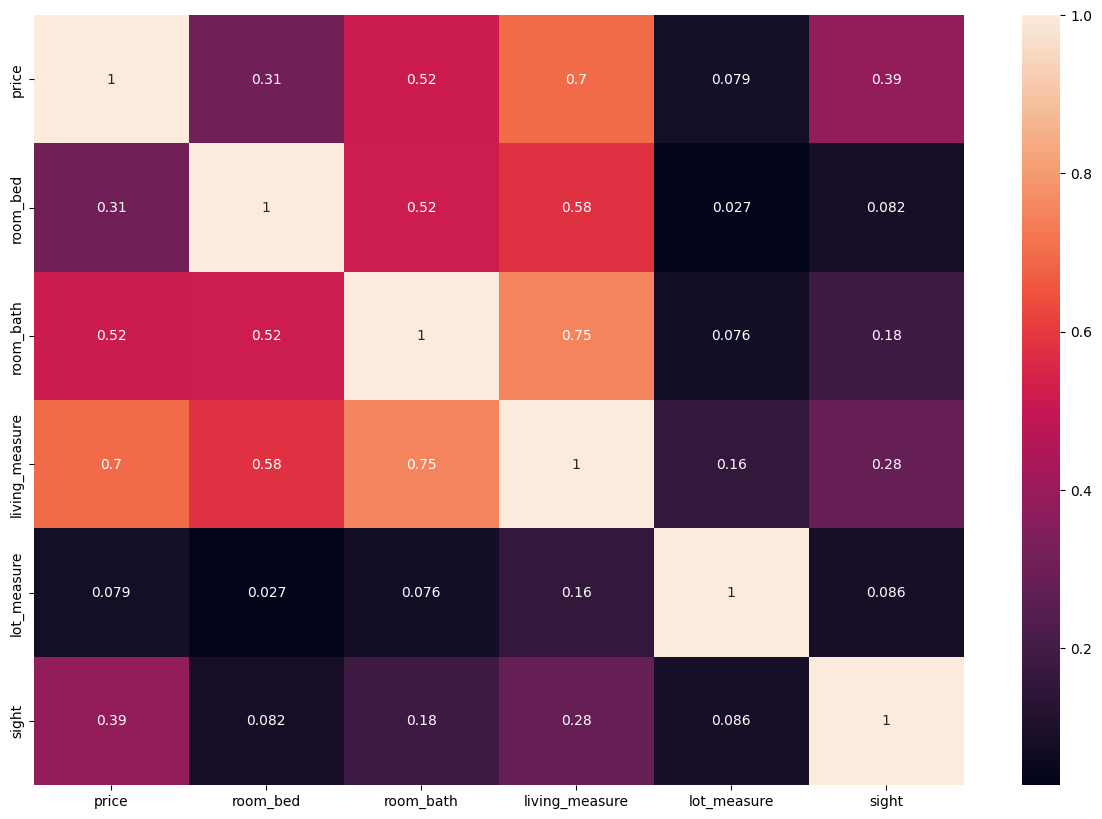

In [111]:
sns.heatmap(houses.iloc[:, 0:9].corr()
            ,annot=True
           ) #--looks like price has positive correlation with room_bed, room_bath, living_measure, ceil, coast and sight. Regression algorithms required.



```
# This is formatted as code
```

Checking for outliers through describe function.

In [112]:
print(houses.describe()) #-- Outliers maybe there.

              price      room_bed     room_bath  living_measure   lot_measure  \
count  2.536000e+04  25360.000000  25360.000000    25360.000000  2.536000e+04   
mean   5.376072e+05      3.362342      2.109720     2067.974606  1.528146e+04   
std    3.680760e+05      0.928057      0.768352      910.977283  4.375625e+04   
min    7.500000e+04      0.000000      0.000000      290.000000  5.200000e+02   
25%    3.250000e+05      3.000000      1.500000     1420.000000  5.000000e+03   
50%    4.500000e+05      3.000000      2.250000     1900.000000  7.500000e+03   
75%    6.350000e+05      4.000000      2.500000     2530.000000  1.045000e+04   
max    7.700000e+06     33.000000      8.000000    13540.000000  1.651359e+06   

              sight       quality  yr_renovated     furnished      prop_age  
count  25360.000000  25360.000000  25360.000000  25360.000000  25360.000000  
mean       0.230284      7.632965     87.045623      0.190024     44.508754  
std        0.758488      1.161063   

# Feature engineering on PHYSICAL CITY to create new column city_rank and categorize all with less than 500 addresses as OTHERS

In [113]:
city_stats = houses.groupby('PHYSICAL CITY')['PHYSICAL CITY'].agg('count').sort_values(ascending=False)
city_stats_less_than_500 = city_stats[city_stats <= 500]
houses['city_location'] = houses['PHYSICAL CITY'].apply(lambda x : 'OTHER' if x in city_stats_less_than_500 else x)
houses.columns
houses.city_location.unique()

array(['KIRKLAND', 'SEATTLE', 'AUBURN', 'KENT', 'BELLEVUE', 'COVINGTON',
       'NORTH BEND', 'OTHER', 'RENTON', 'REDMOND', 'MAPLE VALLEY',
       'FEDERAL WAY', 'ISSAQUAH', 'MOUNTLAKE TERRACE'], dtype=object)

Added reno_age_br based on reno_age

In [114]:
#--renovation_age
houses['reno_age'] = houses['year'].astype(int).max() - houses['yr_renovated'].astype(int)
#--creating a list of our conditions
conditions = [
    (houses['reno_age'] <= 10),
    (houses['reno_age'] > 10) & (houses['reno_age'] <= 20),
    (houses['reno_age'] > 20) & (houses['reno_age'] <= 35),
    (houses['reno_age'] > 35) & (houses['reno_age'] <= 50),
    (houses['reno_age'] > 50)
    ]

#--creating a list of the values we want to assign for each condition
values = ['new_renovation', 'middle_aged_renovation', 'old_renovation', 'very_old_renovation', 'extremely_old_renovation']

#--creating a new column and use np.select to assign values to it using our lists as arguments
houses['reno_age_br'] = np.select(conditions, values)
houses['reno_age_br'].value_counts()

extremely_old_renovation    24308
new_renovation                383
old_renovation                304
middle_aged_renovation        275
very_old_renovation            90
Name: reno_age_br, dtype: int64

Dropping DISTRICT NAME, LOCALE NAME, PHYSICAL CITY, PHYSICAL STATE as not required

In [115]:
houses.drop(['DISTRICT NAME','LOCALE NAME','PHYSICAL CITY', 'PHYSICAL STATE'],axis='columns', inplace=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25360 entries, 0 to 25361
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           25360 non-null  int64  
 1   room_bed        25360 non-null  float64
 2   room_bath       25360 non-null  float64
 3   living_measure  25360 non-null  float64
 4   lot_measure     25360 non-null  float64
 5   ceil            25360 non-null  object 
 6   coast           25360 non-null  object 
 7   sight           25360 non-null  float64
 8   condition       25360 non-null  object 
 9   quality         25360 non-null  float64
 10  yr_built        25360 non-null  object 
 11  yr_renovated    25360 non-null  int64  
 12  furnished       25360 non-null  float64
 13  year            25360 non-null  object 
 14  month           25360 non-null  object 
 15  prop_age        25360 non-null  int64  
 16  prop_age_br     25360 non-null  object 
 17  city_location   25360 non-null 

In [116]:
#--dropping year, month, prop_age columns
houses.drop(['year','month','prop_age','yr_built','yr_renovated','reno_age'],axis='columns', inplace=True)
houses.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,furnished,prop_age_br,city_location,reno_age_br
0,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,0.0,very_old,KIRKLAND,extremely_old_renovation
1,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,0.0,extremely_old,SEATTLE,extremely_old_renovation
2,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,0.0,extremely_old,SEATTLE,extremely_old_renovation
3,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,0.0,very_old,SEATTLE,extremely_old_renovation
4,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,0.0,very_old,SEATTLE,extremely_old_renovation


Outlier detection

In [117]:
#--looking at the price per sq ft
houses['price_per_sqft'] = houses['price']/houses['living_measure']
houses['price_per_sqft'].describe() #--Maximum is 810 which doesn't seem too high. So seems prices are valid.

#--From the dataset spreadsheet, 5 bedrooms in 1750 sq ft living area doesn't look right, since there will also be hall, balcony, bathrom. So some rows may be dropped.
houses[houses['room_bed'] > 4].sort_values('living_measure')
#--Assuming reasonable size of 300 sq ft per room per house.
houses[houses['living_measure']/(houses['room_bed'] + houses['room_bath']) < 300].head()
houses[houses['living_measure']/(houses['room_bed'] + houses['room_bath']) < 300].shape #--255 records are there
houses['room_sqft'] = houses['living_measure']/(houses['room_bed'] + houses['room_bath'])
houses['room_sqft'].describe() #--maximum is infinity, which is not correct.


count    2.536000e+04
mean              inf
std               NaN
min      4.661871e+01
25%      2.983333e+02
50%      3.536842e+02
75%      4.266667e+02
max               inf
Name: room_sqft, dtype: float64

In [118]:
#--calculating how many are within range, out of 25360 we have 12460
houses[(houses['room_sqft'] > np.quantile(houses['room_sqft'], 0.25)) & (houses['room_sqft'] < np.quantile(houses['room_sqft'], 0.75))].shape
#houses.shape

#--Writing a function to get the valid ones per location
def rem_bsqft_outliers(df):
  dfo = pd.DataFrame()
  for key, subdf in df.groupby('city_location'):
    q1 =  np.quantile(subdf['room_sqft'], 0.25)
    q3 =  np.quantile(subdf['room_sqft'], 0.75)
    reduced_df = subdf[(subdf.room_sqft > q1) & (subdf.room_sqft < q3)]
    dfo = pd.concat([dfo,reduced_df], ignore_index = True)
  return dfo
houses = rem_bsqft_outliers(houses)
houses['room_sqft'].describe()

count    12651.000000
mean       357.553547
std         42.652018
min        283.333333
25%        323.636364
50%        353.846154
75%        385.882353
max        485.454545
Name: room_sqft, dtype: float64

<Axes: >

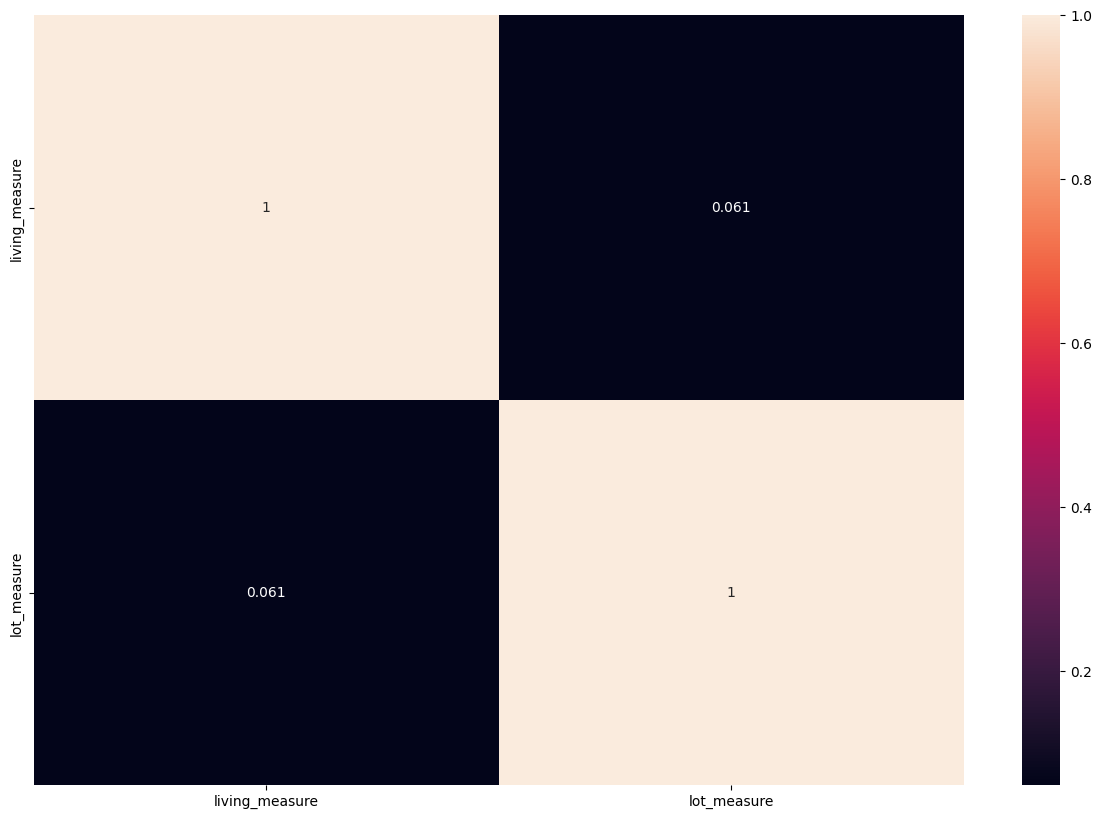

In [119]:
sns.heatmap(houses[['living_measure','lot_measure']].corr(), annot=True) #--living_measure and lot_measure have positive correlation.

<Axes: >

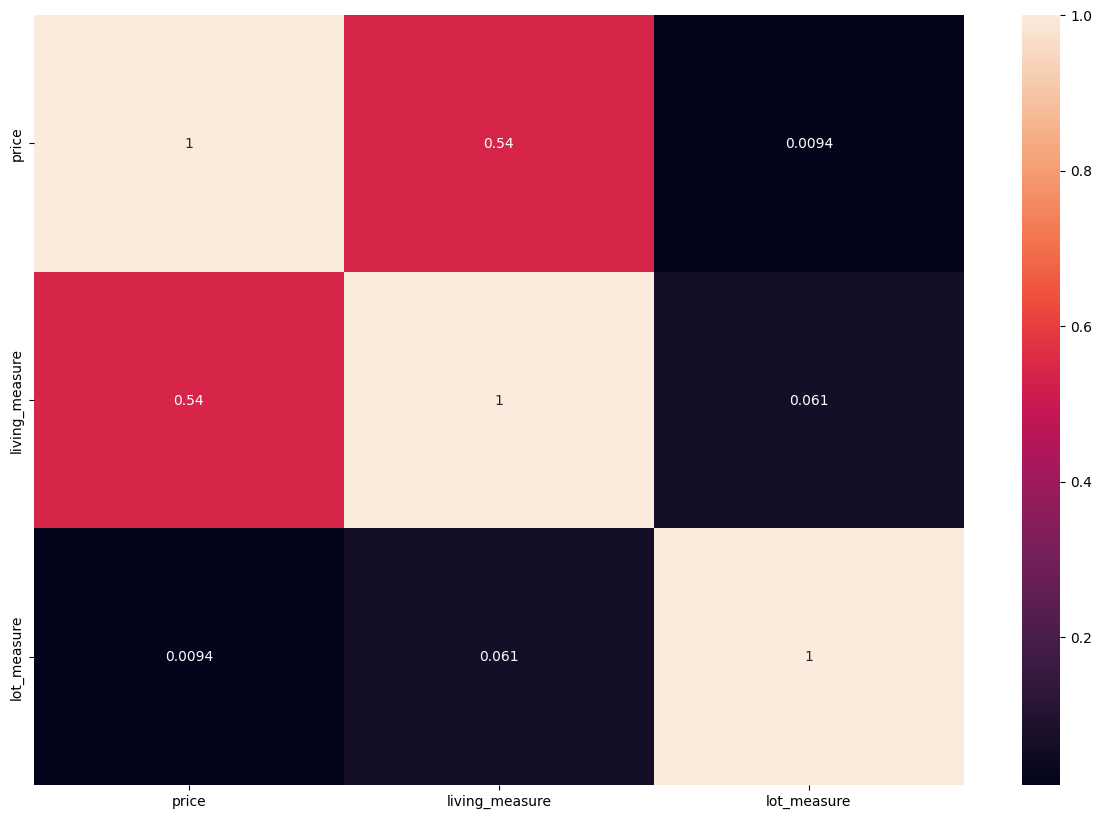

In [120]:
sns.heatmap(houses[['price','living_measure','lot_measure']].corr(), annot=True) #--price has negative correlation with lot_measure and positive with living_measure.
#--So it does not seem lot_measure will be useful in predicting house price

In [121]:
#--Bedroom types available
houses['room_bed'].value_counts() #--maximum 3 bedroom (5610) and 4 bedroom (4193)

#-scatter plot to see if outliers are present, since ideally 3 bedroom price should be less than 4
def plot_loc_splt(df,location):
  b3 = df[(df.city_location == location) & (df['room_bed'] == 3)]
  b4 = df[(df.city_location == location) & (df['room_bed'] == 4)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(b3.living_measure, b3.price, color='blue', label='3 bedrooms', s=50)
  plt.scatter(b4.living_measure, b4.price, marker='+', color='green', label='4 bedrooms', s=50)
  plt.xlabel("Square feet area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

houses['city_location'].unique() #-- 'AUBURN', 'BELLEVUE', 'COVINGTON', 'FEDERAL WAY', 'ISSAQUAH', 'KENT', 'KIRKLAND', 'MAPLE VALLEY', 'MOUNTLAKE TERRACE', 'NORTH BEND', 'OTHER', 'REDMOND', 'RENTON', 'SEATTLE'
houses['city_location'].value_counts().sort_values(ascending=False).head()

SEATTLE     4356
OTHER       2240
BELLEVUE     798
RENTON       797
REDMOND      710
Name: city_location, dtype: int64

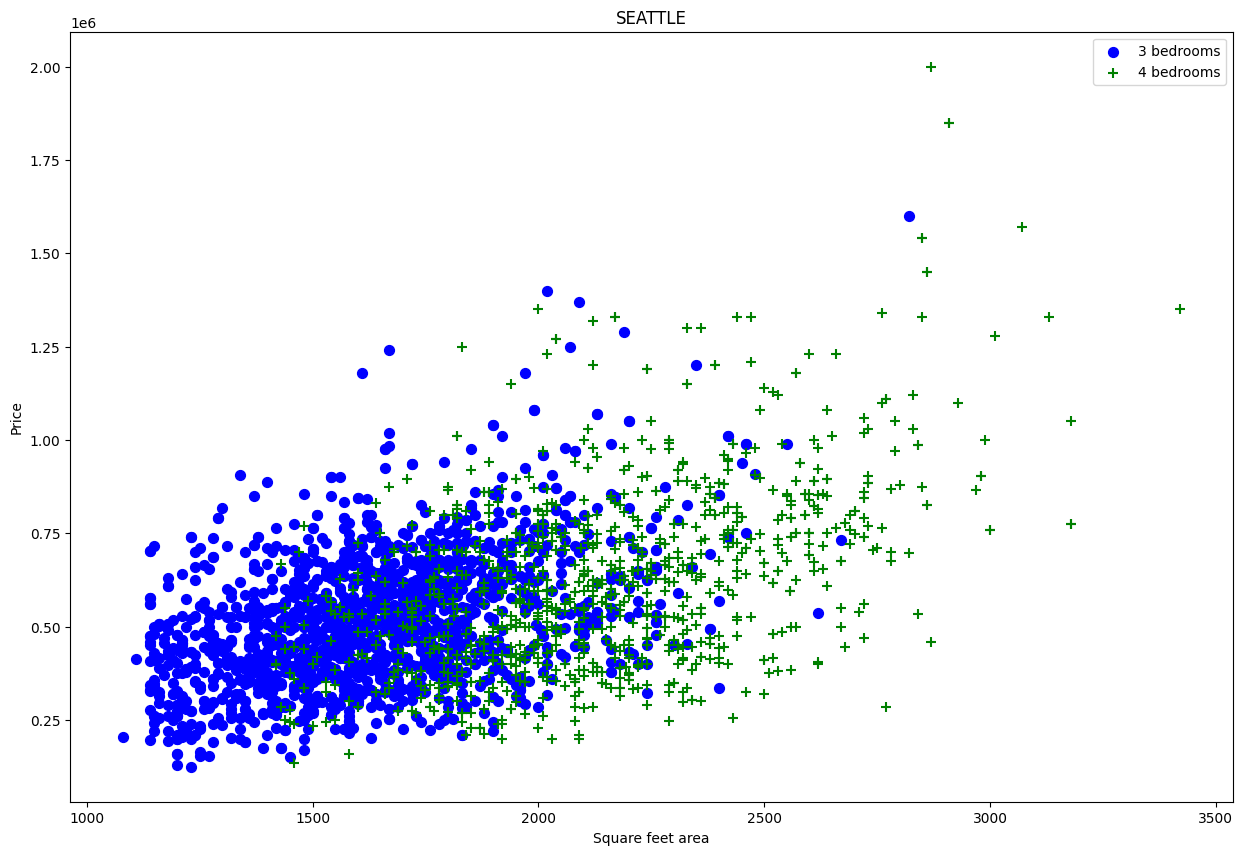

In [122]:
#--Scatter plot for SEATTLE
plot_loc_splt(houses,'SEATTLE') #--clearly there are outliers since the price for the same area is higher for 3 bedroom than 4 bedroom houses

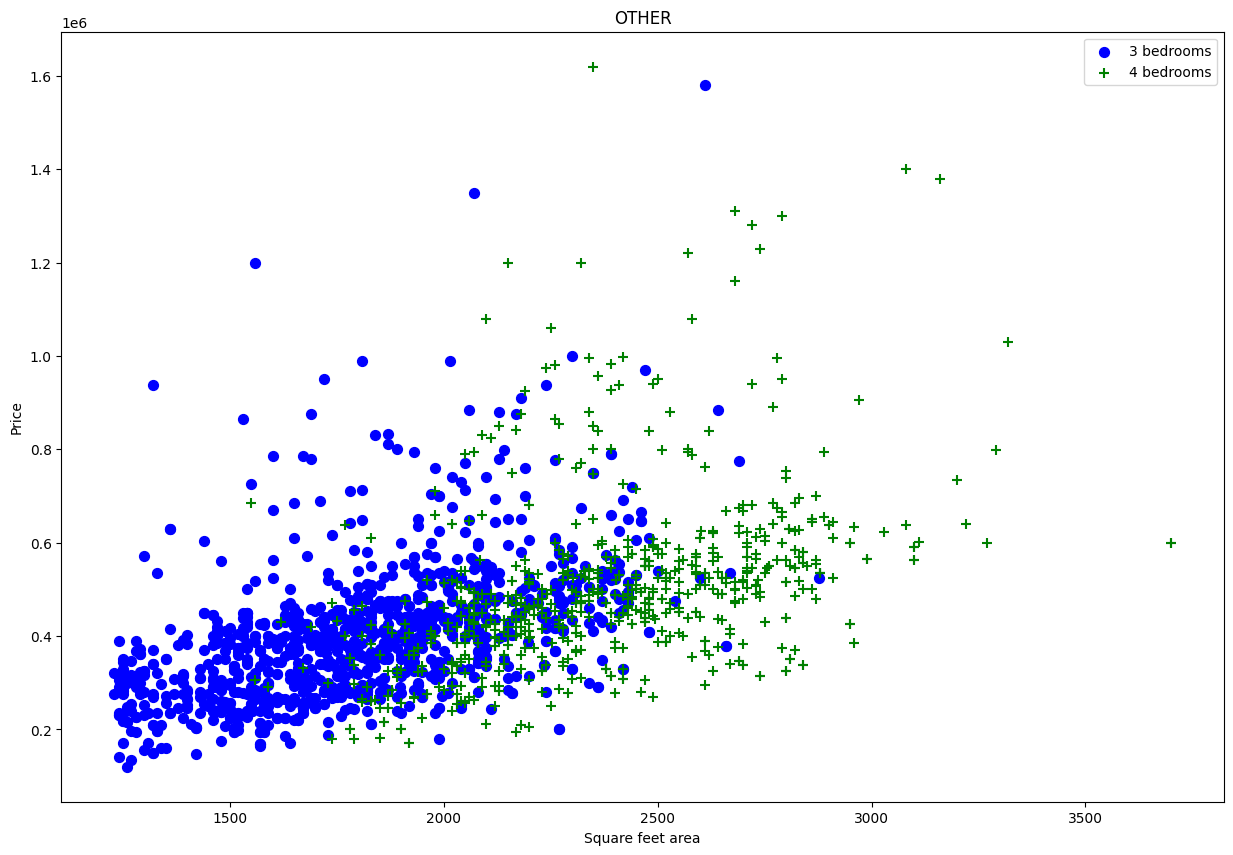

In [123]:
#--Scatter plot for OTHER
plot_loc_splt(houses,'OTHER') #--clearly there are outliers since the price for the same area is higher for 3 bedroom than 4 bedroom houses

In [124]:
#--Outlier removal based on bedrooms, removing the houses for which the prices are less than the mean price of the immediate lower bedroom catrgory
def rem_brm_outliers(df):
  excl_ind = np.array([])
  for location, loc_df in df.groupby('city_location'):
    b_stats = {}
    for b, b_df in loc_df.groupby('room_bed'):
      b_stats[b] = {'mean':np.mean(b_df.price), 'std':np.std(b_df.price), 'count':b_df.shape[0]}

    for b, b_df in loc_df.groupby('room_bed'):
      prev_stats = b_stats.get(b-1)
      if prev_stats and prev_stats['count'] > 5:
        excl_ind = np.append(excl_ind, b_df[b_df.price < prev_stats['mean']].index.values)
  return df.drop(excl_ind, axis='index')

houses = rem_brm_outliers(houses)
houses.shape #--number of records is reduced to 9319

(9319, 16)

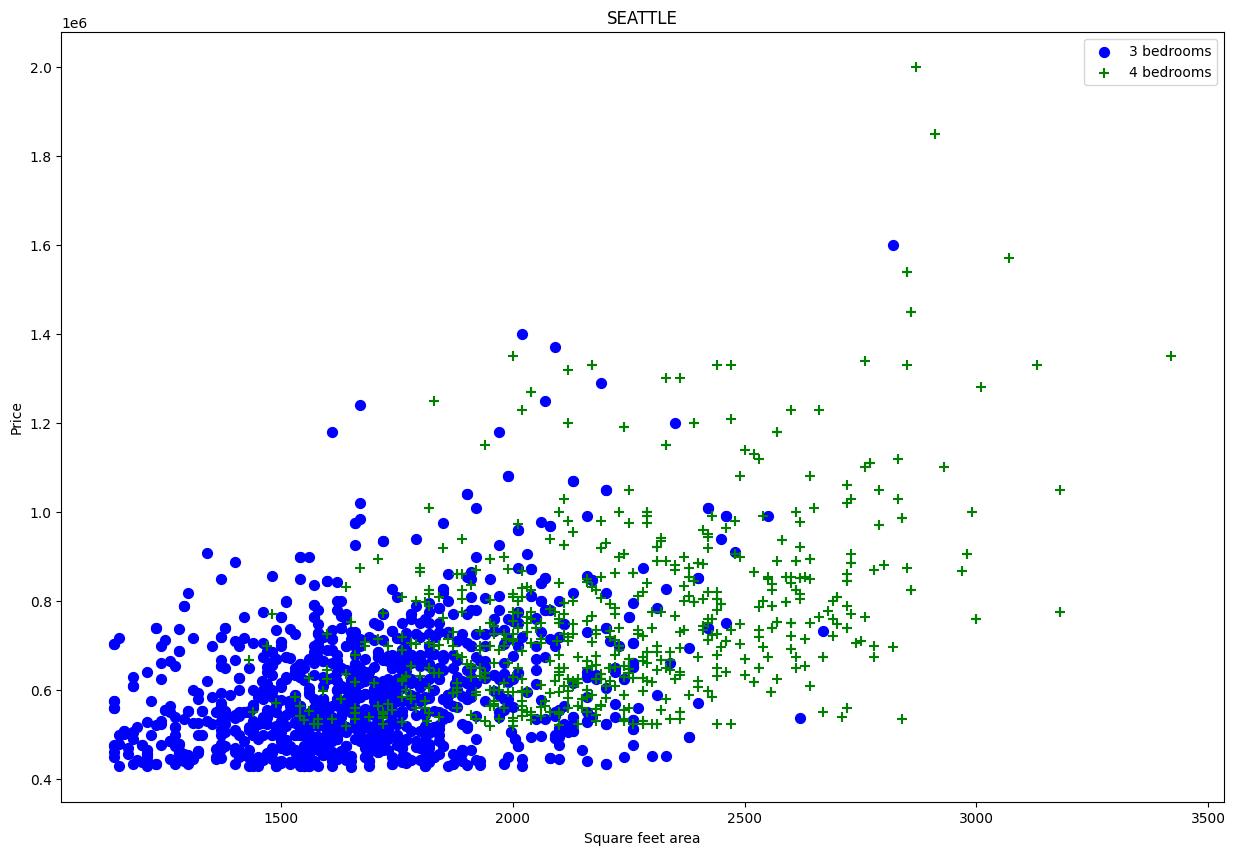

In [125]:
#--Scatter plot for SEATTLE
plot_loc_splt(houses,'SEATTLE') #--There are still a few outliers but the plot looks much better now

In [126]:
#--Checking bathrooms for outliers
houses[houses['room_bed'] > 4].sort_values('room_bath', ascending=False).head() #--5.75 bathrooms for 7 bed rooms seem too many, though logically possible
#--checking to see if any house has more bathrooms than bedrooms
houses[houses['room_bath'] > houses['room_bed']].sort_values('room_bath', ascending=False).head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,furnished,prop_age_br,city_location,reno_age_br,price_per_sqft,room_sqft
4974,2250000,5.0,5.25,3410.0,8118.0,2,0,0.0,3,11.0,1.0,newly_constructed,OTHER,extremely_old_renovation,659.824047,332.682927
614,2250000,5.0,5.25,3410.0,8118.0,2,0,0.0,3,11.0,1.0,newly_constructed,BELLEVUE,extremely_old_renovation,659.824047,332.682927
2263,1060000,4.0,5.25,4140.0,14757.0,2,0,2.0,3,11.0,1.0,newly_constructed,ISSAQUAH,extremely_old_renovation,256.038647,447.567568
711,1040000,4.0,5.00,4110.0,43560.0,2,0,0.0,4,11.0,1.0,very_old,BELLEVUE,extremely_old_renovation,253.041363,456.666667
6931,988990,4.0,4.75,4150.0,6303.0,3,0,0.0,3,9.0,1.0,newly_constructed,REDMOND,extremely_old_renovation,238.310843,474.285714


Text(0, 0.5, 'count')

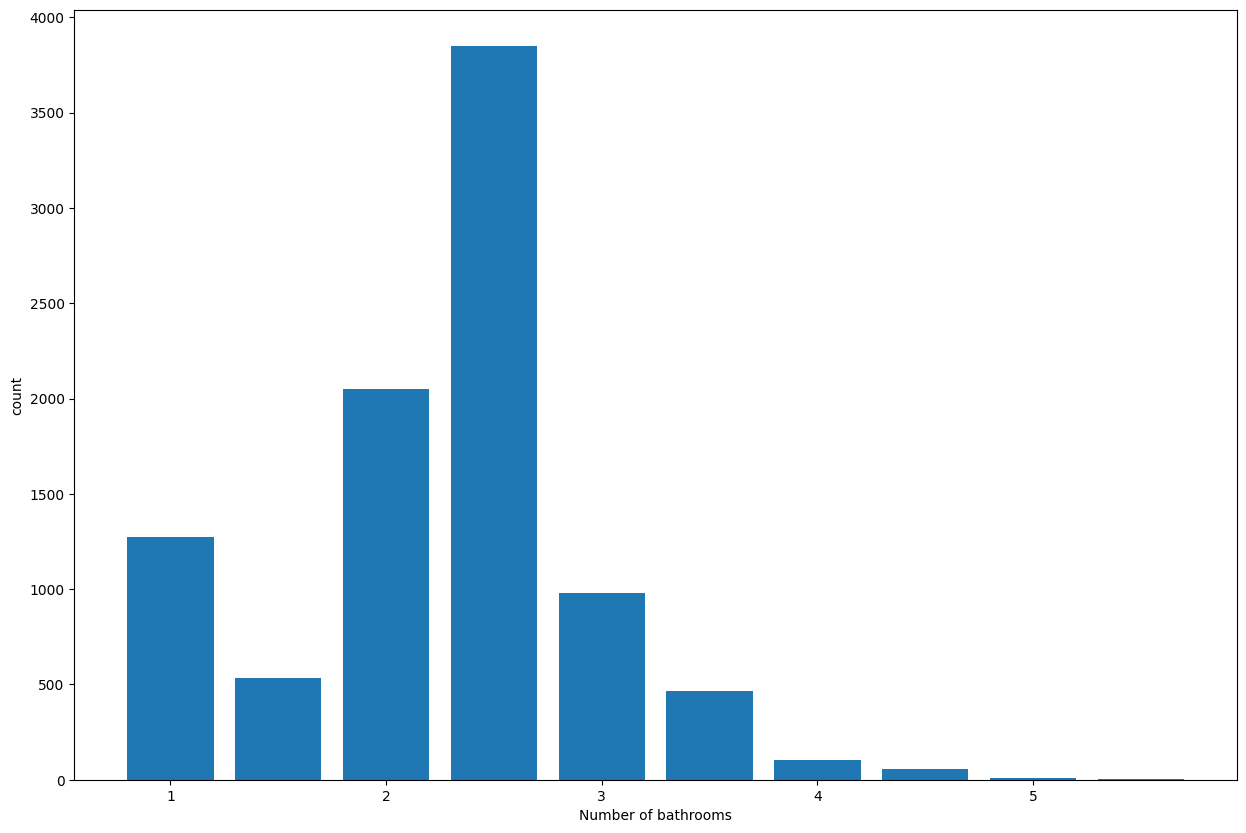

In [127]:
#--Proportion of such outliers with more bathrooms, clearly shows that such outliers are very few
plt.hist(houses.room_bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('count')

In [128]:
#--removing such outliers
houses = houses[houses['room_bath'] < houses['room_bed']]
houses[houses['room_bath'] > houses['room_bed']].sort_values('room_bath', ascending=False).head()
houses.shape #--Number of records is now 8659
houses.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,furnished,prop_age_br,city_location,reno_age_br,price_per_sqft,room_sqft
0,257000,3.0,2.5,1740.0,3721.0,2,0,0.0,3,8.0,0.0,newly_constructed,AUBURN,extremely_old_renovation,147.701149,316.363636
4,299950,3.0,2.5,1870.0,7942.0,2,0,0.0,3,7.0,0.0,old,AUBURN,extremely_old_renovation,160.401070,340.000000
5,229500,3.0,1.0,1230.0,6000.0,1,0,0.0,4,7.0,0.0,very_old,AUBURN,extremely_old_renovation,186.585366,307.500000
7,334888,3.0,2.5,1769.0,7324.0,2,0,0.0,3,9.0,1.0,newly_constructed,AUBURN,extremely_old_renovation,189.309214,321.636364
8,269100,3.0,2.5,2190.0,7904.0,2,0,0.0,3,8.0,0.0,middle_aged,AUBURN,extremely_old_renovation,122.876712,398.181818


Ordinal encoding for condition and quality

In [129]:
houses[houses['quality'] > 8].sort_values(['quality', 'condition'], ascending=False).head() #--for quality of 11, condition 4 and 3 are present
houses[houses['quality'] == 8].value_counts('condition') #--for quality of 8, conditions 1,2,3,4 and 5 are present
houses[houses['quality'] == 11].value_counts('condition') #--for quality of 8, conditions 3,4 are present
#--The above shows condition is not depenedent on quality. Checking the quality values
houses.quality.unique() #--array([ 8,  7,  9,  6,  5, 10, 11,  4])
houses.condition.unique() #--array([ 3.,  4.,  5.,  1., nan,  2.]), so need to check the number of nulls
houses['condition'].isna().sum() #--only 19 nulls are present
houses[houses['condition'].isna()].value_counts('prop_age_br') #--these are a mix of new, middle aged, old. So to be on the safer side, I will replace the nulls with median

Series([], dtype: int64)

In [130]:
import ast
#houses['condition'] = houses['condition'].str.replace('nan', 'None', regex=True).apply(ast.literal_eval).apply(lambda row: [np.nan if x == 'None' else x for x in row])
houses['condition'].replace('nan', np.nan, inplace = True)
houses['condition'] = houses['condition'].fillna(houses['condition'].dropna().mode().values[0])
houses['condition'].isna().values.any() #--no more nan values.

<ipython-input-130-a532237ad362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['condition'].replace('nan', np.nan, inplace = True)
<ipython-input-130-a532237ad362>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['condition'] = houses['condition'].fillna(houses['condition'].dropna().mode().values[0])


False

In [131]:
#houses.to_excel('houses.xlsx')

In [132]:
#--converting the quality to ordinal encoding, 4 = 1, 5 = 2, 6 = 3, 7 = 4, 8 = 5, 9 = 6, 10 = 7, 11 = 8
from sklearn.preprocessing import OrdinalEncoder
quality = ['4','5','6','7','8','9','10','11']
enc = OrdinalEncoder(categories=[quality])
houses[["quality"]] = enc.fit_transform(houses[["quality"]])

In [133]:
houses.quality.value_counts() #--quality changed

3.0    3567
4.0    3140
5.0    1221
2.0     418
6.0     259
1.0      27
7.0      25
0.0       2
Name: quality, dtype: int64

One hot encoding to convert categorical values

In [134]:
#--Performing one hot encoding on the categorical variables
houses = pd.get_dummies(houses, columns=['prop_age_br','reno_age_br','city_location'],drop_first=True)
houses.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,city_location_ISSAQUAH,city_location_KENT,city_location_KIRKLAND,city_location_MAPLE VALLEY,city_location_MOUNTLAKE TERRACE,city_location_NORTH BEND,city_location_OTHER,city_location_REDMOND,city_location_RENTON,city_location_SEATTLE
0,257000,3.0,2.5,1740.0,3721.0,2,0,0.0,3,4.0,...,0,0,0,0,0,0,0,0,0,0
4,299950,3.0,2.5,1870.0,7942.0,2,0,0.0,3,3.0,...,0,0,0,0,0,0,0,0,0,0
5,229500,3.0,1.0,1230.0,6000.0,1,0,0.0,4,3.0,...,0,0,0,0,0,0,0,0,0,0
7,334888,3.0,2.5,1769.0,7324.0,2,0,0.0,3,5.0,...,0,0,0,0,0,0,0,0,0,0
8,269100,3.0,2.5,2190.0,7904.0,2,0,0.0,3,4.0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-135-1f64a7083fa0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses[['price','ceil','furnished', 'coast', 'sight']].corr(), annot=True) #--there is very less linear correlation of price with ceil, coast and sight.


<Axes: >

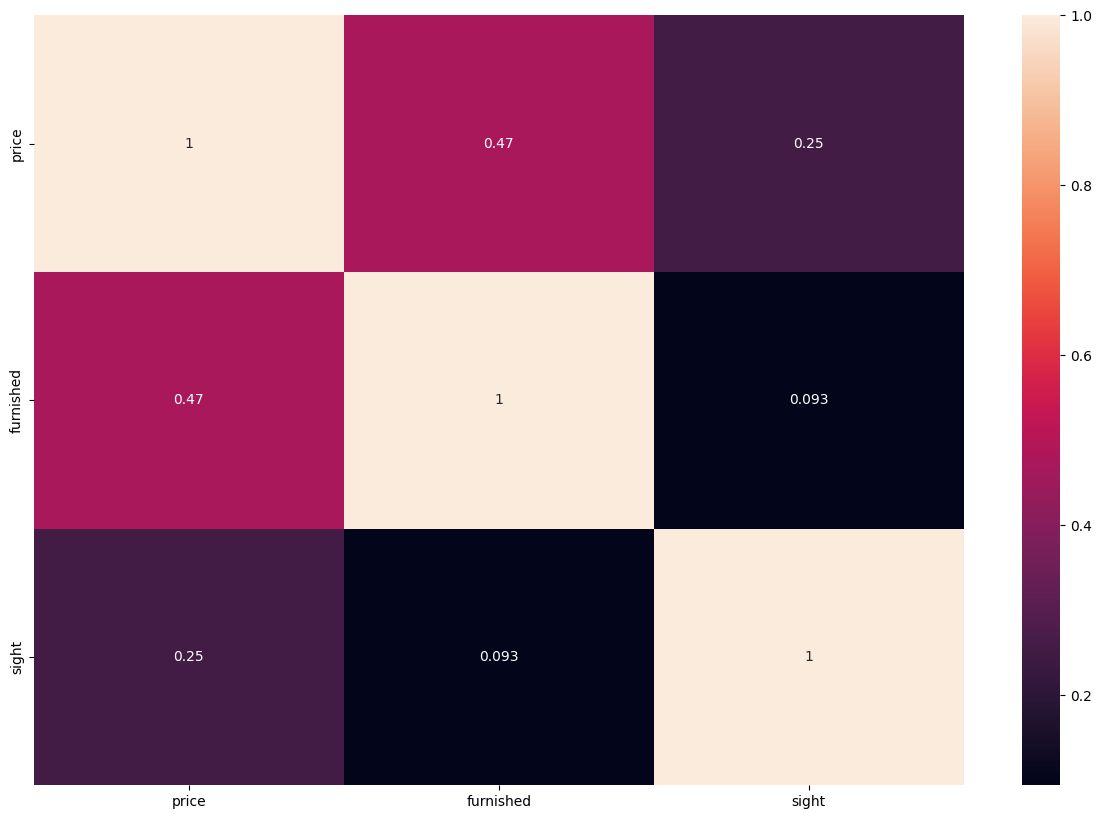

In [135]:
ccsf = houses[['ceil','coast','sight','furnished']]
ccsf.ceil.unique() #--array([2. , 1. , 1.5, 2.5, 3. , 3.5])
ccsf.coast.unique() #--array([0, 1])
ccsf.sight.unique() #--array([0, 2, 3, 4, 1])
ccsf.furnished.unique() #--array([0, 1])
#--checking correlation between ceil, furnished and price
sns.heatmap(houses[['price','ceil','furnished', 'coast', 'sight']].corr(), annot=True) #--there is very less linear correlation of price with ceil, coast and sight.

In [136]:
#--Basis the above, dropping ceil, coast, sight, lot_measure and derived columns room_sqft and price_per_sqft
houses.drop(['ceil','coast','sight','room_sqft','lot_measure','price_per_sqft'],axis='columns', inplace=True)

Starting regression modelling

Train and test split on test size of 20% data

In [137]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = houses.drop('price', axis = 'columns')
X.head()

y = houses.price
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

Cross validation and optimum model selection using GridSearchCV API

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)
#cross_val_score(LinearRegression(), x, y, cv=cv) #--array([0.93185428, 0.93178982, 0.93494841, 0.93605876, 0.9323673 ])

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
#--model selection using grid search cv
def model_selection_by_GSC(X,y):
  algorithms = {
      'linear_regression' : {
          'model' : LinearRegression(),
          'params' : {
              'copy_X' : [True, False],
              'fit_intercept' : [True, False],
              'n_jobs' : [1,2,3],
              'positive' : [True, False]
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1, 2],
              'selection' : ['random', 'cyclic']
          }
      },
      'decision_tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter' : ['best', 'random']
          }
      },
      'gradient_boosting_regressor' : {
          'model' : GradientBoostingRegressor(),
          'params' : {
              'learning_rate' : [0.01,0.02,0.03],
              'subsample' : [0.9,0.5,0.2],
              'n_estimators' : [100,500,1000],
              'max_depth' : [4,6,8]
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
  for algo, config in algorithms.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model' : algo,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })

  return pd.DataFrame(scores, columns=['model','best_score','best_params'])
'''
index	model	best_score	best_params
0	linear_regression	0.7123766291024145	{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
1	lasso	0.7123751509440535	{'alpha': 1, 'selection': 'random'}
2	decision_tree	0.6262612106675063	{'criterion': 'poisson', 'splitter': 'random'}
3	gradient_boosting_regressor	0.7563613075564076	{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}
'''

"\nindex\tmodel\tbest_score\tbest_params\n0\tlinear_regression\t0.7123766291024145\t{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}\n1\tlasso\t0.7123751509440535\t{'alpha': 1, 'selection': 'random'}\n2\tdecision_tree\t0.6262612106675063\t{'criterion': 'poisson', 'splitter': 'random'}\n3\tgradient_boosting_regressor\t0.7563613075564076\t{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}\n"

In [140]:
#--Calling the above method
#model_selection_by_GSC(X,y) #--commenting this since it took me 40 minutes to run. Results are present above

Looks like the gradient_boosting_regressor gave the best score. This can be a good candidate for price prediction

In [141]:
#--Replacing any null values with the most frequent
X_cols = list(X.columns)
print(X_cols)
print(y.name)
for col in X_cols:
  X_train[col] = X_train[col].fillna(X_train[col].dropna().mode().values[0])
  X_test[col] = X_test[col].fillna(X_test[col].dropna().mode().values[0])
y_train = y_train.fillna(y_train.dropna().mode().values[0])
y_test = y_test.fillna(y_test.dropna().mode().values[0])

['room_bed', 'room_bath', 'living_measure', 'condition', 'quality', 'furnished', 'prop_age_br_middle_aged', 'prop_age_br_newly_constructed', 'prop_age_br_old', 'prop_age_br_very_old', 'reno_age_br_middle_aged_renovation', 'reno_age_br_new_renovation', 'reno_age_br_old_renovation', 'reno_age_br_very_old_renovation', 'city_location_BELLEVUE', 'city_location_COVINGTON', 'city_location_FEDERAL WAY', 'city_location_ISSAQUAH', 'city_location_KENT', 'city_location_KIRKLAND', 'city_location_MAPLE VALLEY', 'city_location_MOUNTLAKE TERRACE', 'city_location_NORTH BEND', 'city_location_OTHER', 'city_location_REDMOND', 'city_location_RENTON', 'city_location_SEATTLE']
price




Comparing RMSE difference and Adj R Squared in the models to decide on the best one

In [142]:
from sklearn.metrics import r2_score

def rtn_metrics(X_train, X_test, y_train, y_test, mod):
  met = {}
  mod.fit(X_train, y_train)
  train_pred = mod.predict(X_train)
  test_pred = mod.predict(X_test)
  tr_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
  ts_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
  rmse_diff_pct = ((ts_rmse - tr_rmse)/ts_rmse)*100
  r2 = r2_score(y_test, test_pred)
  adj_r2 = 1 - (1 - r2)*(len(X_train) - 1) / (len(X_train) - (X_train.shape[1] - 1) - 1)
  met['Test RMSE'] = ts_rmse
  met['Train RMSE'] = tr_rmse
  met['RMSE diff pct'] = rmse_diff_pct
  met['Adj R Squared'] = adj_r2
  return(met)

#--setting parameter values as per the hyperparameter tuning
lr = LinearRegression()
print("Linear Regresion parameters are: ", rtn_metrics(X_train, X_test, y_train, y_test, lr))
la = Lasso(alpha=1, selection='random')
print("Lasso Regresion parameters are: ", rtn_metrics(X_train, X_test, y_train, y_test, la))
dtr = DecisionTreeRegressor(criterion='poisson', splitter='random')
print("Decision Tree Regressor parameters are: ", rtn_metrics(X_train, X_test, y_train, y_test, dtr))
gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=8, learning_rate=0.01, subsample=0.5)
print("Gradient Boosting Regressor parameters are: ", rtn_metrics(X_train, X_test, y_train, y_test, gbr))

Linear Regresion parameters are:  {'Test RMSE': 124217.47119892671, 'Train RMSE': 128098.76732664404, 'RMSE diff pct': -3.1245976031034086, 'Adj R Squared': 0.7352727798431685}
Lasso Regresion parameters are:  {'Test RMSE': 124218.36251307132, 'Train RMSE': 128098.78441407606, 'RMSE diff pct': -3.1238714007330493, 'Adj R Squared': 0.7352689807646644}
Decision Tree Regressor parameters are:  {'Test RMSE': 153675.52018694414, 'Train RMSE': 25524.522598493728, 'RMSE diff pct': 83.39063855619717, 'Adj R Squared': 0.594825023517459}
Gradient Boosting Regressor parameters are:  {'Test RMSE': 117913.9272767319, 'Train RMSE': 69612.50250412193, 'RMSE diff pct': 40.96329067155187, 'Adj R Squared': 0.7614587775503289}


For Gradient Boosting Regressor and Decision Tree Regressor, the RMSE difference percentages are very high, which indicates underfitting. Therefore considering low RMSE diff pct and high Adjusted R squared and score, we select Linear Regression as the most suitable model.

In [143]:
lr = LinearRegression() #--setting parameter values
lr.fit(X_train, y_train) #--training the model
lr.score(X_test, y_test)


0.7362665580303007

In [144]:
np.zeros(len(X.columns)) #--this will create a new array of same number of zeros independent variables columns
X.columns #--first 5 columns are 'room_bed', 'room_bath', 'living_measure', 'condition', 'quality'

Index(['room_bed', 'room_bath', 'living_measure', 'condition', 'quality',
       'furnished', 'prop_age_br_middle_aged', 'prop_age_br_newly_constructed',
       'prop_age_br_old', 'prop_age_br_very_old',
       'reno_age_br_middle_aged_renovation', 'reno_age_br_new_renovation',
       'reno_age_br_old_renovation', 'reno_age_br_very_old_renovation',
       'city_location_BELLEVUE', 'city_location_COVINGTON',
       'city_location_FEDERAL WAY', 'city_location_ISSAQUAH',
       'city_location_KENT', 'city_location_KIRKLAND',
       'city_location_MAPLE VALLEY', 'city_location_MOUNTLAKE TERRACE',
       'city_location_NORTH BEND', 'city_location_OTHER',
       'city_location_REDMOND', 'city_location_RENTON',
       'city_location_SEATTLE'],
      dtype='object')

Below function will predict price. Possible values of the parameters are as follows :
furnished => 'Y/y/N/n'

age => 'prop_age_br_middle_aged', 'prop_age_br_newly_constructed', 'prop_age_br_old', 'prop_age_br_very_old',

renovation => 'reno_age_br_middle_aged_renovation', 'reno_age_br_new_renovation','reno_age_br_old_renovation', 'reno_age_br_very_old_renovation',

location =>
'city_location_BELLEVUE',
'city_location_COVINGTON',
'city_location_FEDERAL WAY',
'city_location_ISSAQUAH',
'city_location_KENT',
'city_location_KIRKLAND',
'city_location_MAPLE VALLEY',
'city_location_MOUNTLAKE TERRACE',
'city_location_NORTH BEND',
'city_location_OTHER',
'city_location_REDMOND',
'city_location_RENTON',
'city_location_SEATTLE'

cond => ranges from 1 to 5, 1 = bad and 5 = best

qual => ranges from 0 to 7 , 0 = bad and 7 = best

In [145]:
#--writing a function to predict the price
def predict_price(location, renovation, age, furnished, nbed, nbath, sqft, cond, qual):
  loc_index = np.where(X.columns==location)[0][0] #--this will give the exact column number of the city_location
  ren_index = np.where(X.columns==renovation)[0][0] #--this will give the exact column number of the renovation bracket
  age_index = np.where(X.columns==age)[0][0] #--this will give the exact column number of the age bracket

  if furnished.lower() == 'y':
    furn_index = np.where(X.columns=='furnished')[0][0] #--this will give the exact column number of furnished

  x = np.zeros(len(X.columns))
  x[0] = nbed
  x[1] = nbath
  x[2] = sqft
  x[3] = cond #--ranges from 1 to 5, 1 = bad and 5 = best
  x[4] = qual #--ranges from 0 to 7 , 0 = bad and 7 = best

  if loc_index >= 0:
    x[loc_index] = 1

  if ren_index >= 0:
    x[ren_index] = 1

  if age_index >= 0:
    x[age_index] = 1

  if furn_index >= 0:
    x[furn_index] = 1

  return lr.predict([x])[0]

In [146]:
#--calling the function to predict price
predict_price('city_location_SEATTLE', 'reno_age_br_new_renovation', 'prop_age_br_newly_constructed', 'y', 3, 2, 1500, 5, 7)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


827164.2290854928

Pickle and flask

In [147]:
import pickle
with open('lr','wb') as f:
  pickle.dump(lr,f)


Column information

In [148]:
from json import dumps, loads
cols = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
  f.write(dumps(cols))